Como interpretar nuestros datos y transmitirlos a los demas? ¿Cómo podemos asegurarnos de que nuestros datos sean precisos y confiables?

Una imagen vale mas que mil palabras..

# Visualización de datos##



Para visualización usaremos el módulo **maplotlib.pyplot**. En este módulo trabajaremos en todo momento con una *figura* y unos *ejes*. En general, usaremos las funciones que usemos crearán nuevas figuras (y los ejes asociados) y cambiarán el foco del módulo a ellas. Si estamos interesados en volver a utilizar estas figuras podemos guardarlas en variables y cambiar el foco de nuevo posteriormente. Así, tenemos la clase 

In [65]:
import matplotlib.pyplot as plt
import numpy as np

En primer lugar mostramos algunos ejemplos sencillos con la función plot:

Una figura (clase figure) es un conjunto de ejes (clases Axes).
Cada uno de estos ejes es lo que nosotros entendemos como graficas

### LAS FUNCIONES PRINCIPALES DEL MODULO pyplot son:
1. subplots: toma n y m indicando el numero de filas y columnas que tendra la figura, es decir tendremos n filas con m ejes. EL segundo argumento es una lista con n listas, cada uno de m objetos de tipos axes.

2. tight_layout: ajusta el tama;o de los ejes para asegurarse de que todas las etiquetas se muestran y no se solapan distintos ejes.
En caso de fallas podemos usar la funcion subplots_adjust, que nos permite ajustar distancias en la figura! Esta obtiene los sigueintes parametros todas ellas con valores entre nuemros entre 0 y 1:
- left: la distancia entre el borde izquierdo de la figura y el eje izquierdo
- right: la distancia entre el borde derecho de la figura y el eje derecho
- bottom: la distancia entre el borde inferior de la figura y el eje inferior
- top: la distancia entre el borde superior de la figura y el eje superior
- wspace: la distancia entre los ejes en la direccion horizontal
- hspace: la distancia entre los ejes en la direccion vertical

3. subplot: cambia el foco a los ejes dados como argumentos, es necesario darle el nuemro de filas y el de columnas. Y el indice de los ejes, donde 1 corresponde a los superiores izquierdos y se incrementa a la derecha de arriba a abajo

4. tight_layout() en la biblioteca de Python Matplotlib se utiliza para ajustar automáticamente los elementos de un gráfico (como las subtramas, etiquetas y títulos) de manera que se optimice el uso del espacio disponible. Esto ayuda a evitar que los elementos del gráfico se superpongan y asegura que todo el contenido sea visible y esté bien distribuido dentro de la figura.

5. gfc y gca: devulven la figura y los ejes actuales respectivamente

6. suptitle: fija el titulo de la figura acutal

7. title: fija el titulo de los ejes actuales

8. xlabel: modifica la etiqueta en el eje horizontal de los ejes actuales

9. ylabel: modifica el eje vertical de los ejes actuales

10. xticks y yticks: sirve para acceder y modificar las marcas en el eje horizontal y vertical: sin argumento devolvera dos listas, para eso podemos agregar datos

11. axis: devulve una lista [xmin, xmax,ymin,ymax] (limites de la grafica), sin embargo con argumento podemos modificar sus limites:
- axis(l), con l una lista de cuatro elementos indicando los limites de la grafica!
- axis('equal'), para que los ejes sean iguales en escala
- axis('square'), para que los ejes sean iguales en escala y la figura sea cuadrada
- axis('tight'), para que los ejes sean ajustados a los datos (todos los valores se muestren)
- axis('off'), para que los ejes sean ocultados
- axis('on'), para que los ejes sean mostrados
- axis('image'), para que los ejes sean ajustados a la imagen

12. plot: dibuja una grafica de los ejes actuales (esta ofrece muchas variantes)
- podemos personalizar muchos elementos (pagina 227)

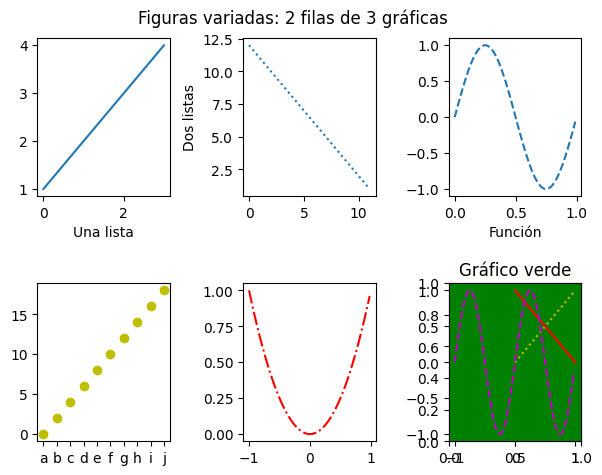

In [66]:
### PAGINA 228

fig, [[arriba_iz, arriba_cnt, arriba_dr], [abajo_iz, abajo_cnt, abajo_dr]] = plt.subplots(2,3)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.55,
                    wspace=0.55)
plt.suptitle('Figuras variadas: 2 filas de 3 gráficas')

#figura arriba izquierda
plt.sca(arriba_iz)
plt.plot([1,2,3,4])
plt.xlabel('Una lista')
plt.sca(arriba_cnt)#   /-> de doce hasta cero


#figura del medio arriba
plt.plot(range(12), range(12, 0, -1), linestyle='dotted')
plt.ylabel('Dos listas')
x = np.arange(0.0, 1.0, 0.01) # 10 veces
plt.sca(arriba_dr)


#figura arriba a la derecha
#                  /-> entre mas grande este numero mayor longitud
plt.plot(x, np.sin(2*np.pi*x), linestyle='dashed')
plt.xlabel('Función')
plt.sca(abajo_iz)


#figura abajo izquierda
plt.plot(range(10), range(0,20,2), 'yo')
plt.xticks(range(10), ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
plt.sca(abajo_cnt)

#figura abajo medio
x = np.arange(-1.0, 1.0, 0.02)
plt.plot(x, x**2, 'r',linestyle='dashdot')


#figura abajo derecha
plt.subplot(236, facecolor='g')
plt.plot([0,1], "y:", [1,0], "r", x, np.sin(2*np.pi*x), "m--")
plt.title('Gráfico verde')
plt.savefig("figuras_variadas")
plt.show()

# GRAFICAS
veremos como graficar una grafica circular, de caja, de barras e histogramas.

Para esto usaremos una base dedatos del ministerio de empleo de Espa;a del 2018.
El fichero ya esta descargado, por lo cual no sera necesario buscarlo... unicamente deberemos cargarlo localmente.

In [67]:
from xlrd import open_workbook
ruta_datos = "../../data/Cap8/parosexoedadprov.xls" # CARGAR DATOS (EXCEL)

Por simplicidad suponemos que encontramos la ciudad.

## DETALLES DE GRAFICA CIRCULAR
Este se usa para mostrar proporciones...
en matplotlib acepta varios parametros...

1. `x`, la lista de valores que se mostraran, para cada valor se mostrara su valor correspondiente, respecto a la suma total.
Si la grafica no tiene un valor mayor a uno sera sombreada indicando que la grafica no lelga al 100%
2. `labels`, una lista de etiquetas para cada valor en `x`.
3. `autopct`, un string que se mostrara el porcentaje siendo los criterios de formato de python!
4. `shadow`, booleano que indica si la grafica necesita sombra
5. `startangle`, el angulo de inicio de la grafica en grados, numero real entre 0 y 360, que indica donde inicia la primera seccion de la grafica. por defecto viene en 0, pero lo mas comodo para usar es 90 grados.


Esta funcion devuelve 3 listas, la primera es una lsita de objetos de clase Wedge, que son las distintas partes donde se dividieron el circulo (patches).

La segunda son los textos usados apra cada una de estas.

La tercera son el porcentaje usado apra cada una



Es interesante usar legend apra mostrar la grafica, que recibe como aprametros el primer elemnto devuelto, sus etiquetas, y la localizacion.

[<matplotlib.patches.Wedge object at 0x6fffc4300790>, <matplotlib.patches.Wedge object at 0x6fffb7f49f60>]
[Text(-0.8600146582346296, 0.6858387475358718, 'dos'), Text(0.8600147224474838, -0.6858386670154851, 'cinco')]
[Text(-0.4690989044916161, 0.3740938622922937, '28.6%'), Text(0.46909893951680925, -0.3740938183720827, '71.4%')]


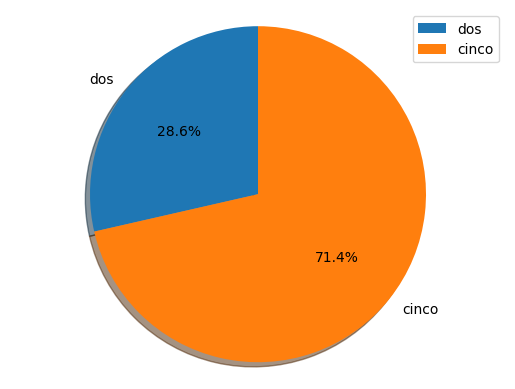

In [68]:
vals, etqs = [2,5], ['dos', 'cinco'] # EJE X Y LABELS
fig, ejes = plt.subplots()

#                                                            /-> se mostrara un decimal
patches, text_cat, text_porc = ejes.pie(vals, labels=etqs, autopct='%1.1f%%', shadow=True, startangle=90)
print(patches)#2
print(text_cat)# dos, cinco
print(text_porc)#['2/7 (28%)', '5/7 (71%)']
ejes.axis('equal')
plt.legend(patches, etqs, loc="best") # usamos best para que nos situe automaticamente la grafica en el mejor lugar

#de igual forma la podemos guardar
plt.savefig("tarta_ejemplo")

plt.show()

Ahora veamos un ejemplo real:

In [69]:
def busca_ciudad(ciudad, ruta):
    libro = open_workbook(ruta)
    hoja = libro.sheet_by_index(0)
    encontrada = False
    i = 8
    res = -1
    while not encontrada and i < 70:
        if hoja.cell(i,1).value == ciudad:
            encontrada = True
            res = i
        i = i + 1
    return res
def calcula_estadisticas(ciudad, ruta, mujeres):
    libro = open_workbook(ruta)
    hoja = libro.sheet_by_index(0)
    sexo = "MUJERES"
    correccion = 1
    if not mujeres:
        sexo = "HOMBRES"
        correccion = 0
    fila = busca_ciudad(ciudad, ruta)
    col = 5
    edad = 6
    cat = 7
    etiquetas = []
    valores = []
    total = 0
    while col < 13:
        if hoja.cell(cat, col).value == sexo:
            etq = hoja.cell(edad, col - correccion).value
            valor = hoja.cell(fila, col).value
            etiquetas.append(etq)
            valores.append(valor)
            total = total + valor
        col = col + 1
    return valores, etiquetas
calcula_estadisticas("ALMERIA", ruta_datos, True)

([2435.0, 3744.0, 12567.0, 13774.0],
 ['MENORES DE 25 AÑOS',
  'DE 25 A 29 AÑOS',
  'DE 30 A 44 AÑOS',
  'MAYORES DE 45 AÑOS'])

In [70]:
def paro_edades_tarta(ciudad, ruta, mujeres=True):
    vals, etqs = calcula_estadisticas(ciudad, ruta, mujeres)
    print(vals,etqs)
    
    explode = (0, 0, 0, 0.1)  

    fig, ejes = plt.subplots()
    patches, text_cat, text_porc = ejes.pie(vals, explode=explode, labels=etqs, autopct='%1.1f%%', shadow=True, startangle=90)
    ejes.axis('equal')
    plt.legend(patches, etqs, loc="best")
    plt.savefig("tarta")
    plt.show()

Llamaremos a la función con la ciudad deseada para obtener el diagrama correspondiente:

[2435.0, 3744.0, 12567.0, 13774.0] ['MENORES DE 25 AÑOS', 'DE 25 A 29 AÑOS', 'DE 30 A 44 AÑOS', 'MAYORES DE 45 AÑOS']


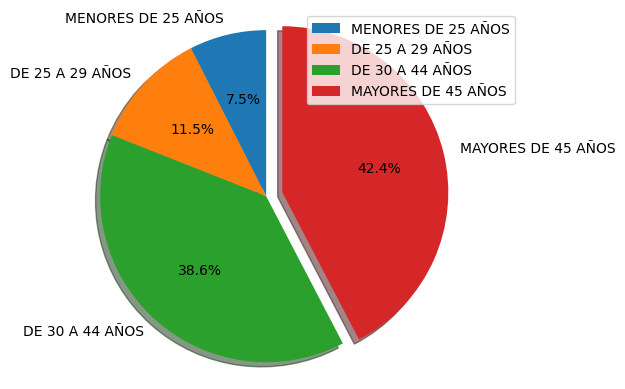

In [71]:
paro_edades_tarta("ALMERIA", ruta_datos)

Pasamos ahora a dibujar un diagrama de cajas. Para ello en primer lugar recopilamos porcentajes de paro por segmento de población y provincia:

# GRAFICA DE CAJA

Para esto matplotlib nos ofrece la funcion boxplot que necesita de los sigueintes parametros:
1. `x`:este es el unico argumento obligatorio... pasa n cantidad de listas con cierta cantidad de datos. cada lista representara una caja
2. `notch`: es un parametro bolleano que indica que debe haber un hueco indicando donde se encuentra la media.
3. `sym`: que caracter queremos para los valores atipicos, por defecto es un circulo.
4. `vert`: es un booleano que indica si la caja se muestra horizontal (false) o vertical (true). Este valor por defecto viene en True.
5. `whis`: es un numero real que indica el valor a multiplicar por el rango (por defecto 1.5)
5. `usermedians`: lista de valores compatible con x que sobreescribe las medianas calculadas por python. Si alguno de los valores es none se usa alguno de los valores computados por python.
6. `positions`: es una lsita de enteros de longitud compatible con x, que indica las posiciones en las que se ubicaran las cajas, pore defecto vienen como: 1, 2, ..., n con la n cantidades a mostrar
7. `widths`: este valor es un real que indica el ancho de las cajas, por defecto en 0.5
8. `labels`: lista para las etiquetas de cada lista de x.

<br>
<br>

Este devuelve un diccioanrio con algunas claves importantes:
<br>
- boxes, con informaicon sobre las cajas <br>
- medians, con las lineas que representan la mediana de la caja<br>
- whiskers, con la informacion de los bigotes<br>
- caps, valores minimos y maximos<br>
- fliers, valores atipicos<br>
- means, la media de cada caja<br>


In [72]:
def datos_provincia_porcentajes(ruta):
    libro = open_workbook(ruta)
    hoja = libro.sheet_by_index(0)
    # Evitamos coger datos de comunidades, solo de provincias
    # Sí cogemos las comunidades con una sola provincia, ya que no se hacen distinciones
    comunidades = [16, 20, 25, 32, 42, 47, 51, 54, 59, 66]
    etiquetas = [hoja.cell(6,5).value, hoja.cell(6,7).value, hoja.cell(6,9).value, hoja.cell(6,11).value]
    totales = [[], [], [], []]
    for i in range(8, 71):
        if comunidades.count(i) == 0:
            total = hoja.cell(i,2).value
            
            menores = ((hoja.cell(i,5).value + hoja.cell(i,6).value) * 100) / total
            m25_29 = ((hoja.cell(i,7).value + hoja.cell(i,8).value) * 100) / total
            m30_44 = ((hoja.cell(i,9).value + hoja.cell(i,10).value) * 100) / total
            mayores = ((hoja.cell(i,11).value + hoja.cell(i,12).value) * 100) / total
            #print(menores, m25_29, m30_44, mayores, "=", menores+m25_29+m30_44+mayores)
            totales[0].append(menores)
            totales[1].append(m25_29)
            totales[2].append(m30_44)
            totales[3].append(mayores)
    return totales

Así, obtenemos una lista de 4 listas. Cada una de estas listas contiene datos para un tramo de población para todas las provincias:

In [73]:
datos_provincia_porcentajes(ruta_datos) # la suma de cada linea es 100!

[[8.286365271615301,
  8.272979612672685,
  10.053396183704177,
  9.399532223328624,
  8.419951764027918,
  10.762609937608058,
  8.407994927921408,
  8.64999828983822,
  10.745762711864407,
  10.705842620736238,
  9.562209884408848,
  6.9824732479663325,
  13.033444380339096,
  6.581513874032593,
  6.094598944565291,
  7.039697730492928,
  9.139413888299002,
  10.73787507076807,
  8.709308966304969,
  8.255480246687428,
  9.277752146801006,
  8.188625139397802,
  7.590874905991477,
  7.884580594584816,
  9.569377990430622,
  8.29913542372206,
  8.86419434035405,
  9.58694543600204,
  8.794260587826892,
  7.241591153432652,
  6.714651417932777,
  7.946934569809376,
  7.269049224544841,
  8.051445389670604,
  6.850828015604413,
  8.876874782002092,
  7.6784636720693635,
  10.709879082010364,
  10.416064341472389,
  4.890815408522124,
  5.399113082039912,
  5.490020407147479,
  4.705882352941177,
  7.6934411434254875,
  10.160408110646605,
  9.175717070453912,
  6.5292937203269545,
  5.5

Con estos datos podemos crear fácilmente un diagrama de caja:

In [94]:
def diagrama_caja(ruta):
    totales = datos_provincia_porcentajes(ruta)
    plt.subplots()
    etqs = ["Menores 25", "25-29", "30-44", "Mayores 45"]
    plt.boxplot(totales, labels=etqs, widths=0.8)
    plt.savefig("cajas")
    plt.show()

/tmp/ipykernel_5548/4052271126.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(totales, labels=etqs, widths=0.8)


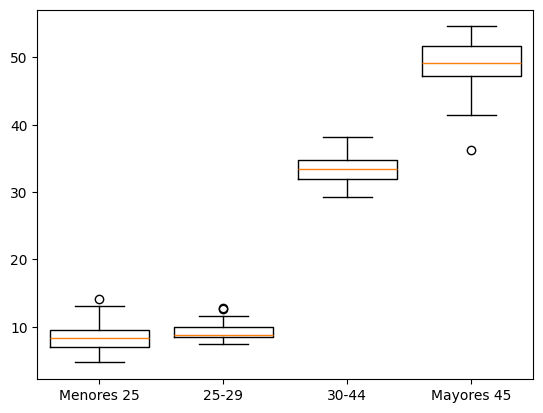

In [95]:
diagrama_caja(ruta_datos)

Algo curiosos es que en la grafica de 25-29 la media esta muy alejada del centro, vamos a graficarla de otra forma para ver como se comporta:

<br>
Es curiosos que la mayoria de datos abajo de la linea roja se asignen en la parte derecha (arriba de la media), por esta razon la media no esta ubicada cerca al centro...
los datos arriba de la linea roja son los bigotes de la caja

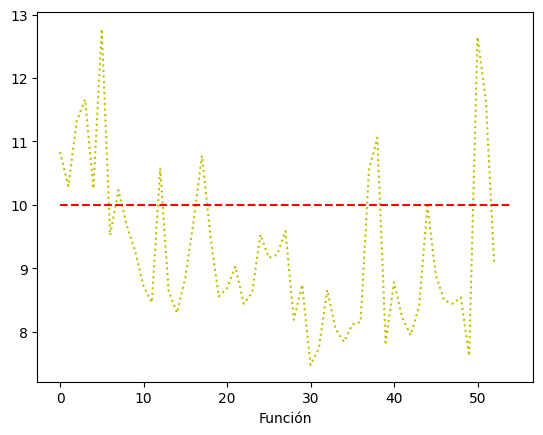

AHORA MIREMOS LA CUARTA GRAFICA


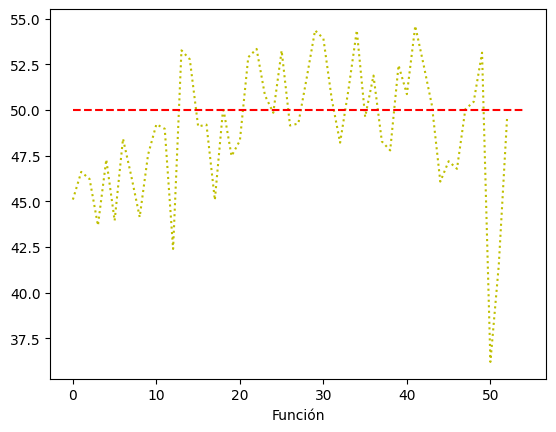

In [91]:
totales = datos_provincia_porcentajes(ruta_datos)
plt.plot(totales[1], "y:", [0, 54], [10, 10], "r--")
plt.xlabel('Función')
plt.show()

print("AHORA MIREMOS LA CUARTA GRAFICA")

plt.plot(totales[3], "y:", [0, 54], [50, 50], "r--")
plt.xlabel('Función')
plt.show()

Pasamos ahora a generar diagramas de barras. Para ello, en primer lugar obtenemos datos para un conjunto de ciudades pasado como parámetro:

In [77]:
def datos_ciudades(ruta, ciudades):
    libro = open_workbook(ruta)
    hoja = libro.sheet_by_index(0)
    resultados = []
    etqs = []
    for i in range(8, 71):
        if hoja.cell(i,1).value in ciudades:
            resultados.append(hoja.cell(i,2).value)
            etqs.append(hoja.cell(i,1).value)
    return etqs, resultados

In [78]:
datos_ciudades(ruta_datos, ["COM. DE MADRID", "BARCELONA", "VALENCIA", "TERUEL"])

(['TERUEL', 'BARCELONA', 'VALENCIA', 'COM. DE MADRID'],
 [5922.0, 300790.0, 188918.0, 380051.0])

A partir de estos datos es sencillo dibujar un diagrama de barras simple:

In [79]:
def barras_ciudades(ruta, ciudades):
    etqs, datos = datos_ciudades(ruta, ciudades)

    ind = np.arange(4)  # índices para las X
    ancho = 0.35        # Ancho de las barras
    
    fig, eje = plt.subplots()
    barras = eje.bar(ind, datos, ancho, color='r', tick_label=etqs)

    plt.ylabel('Cantidad')
    plt.tight_layout()

    plt.savefig("barras1")
    plt.show()
    

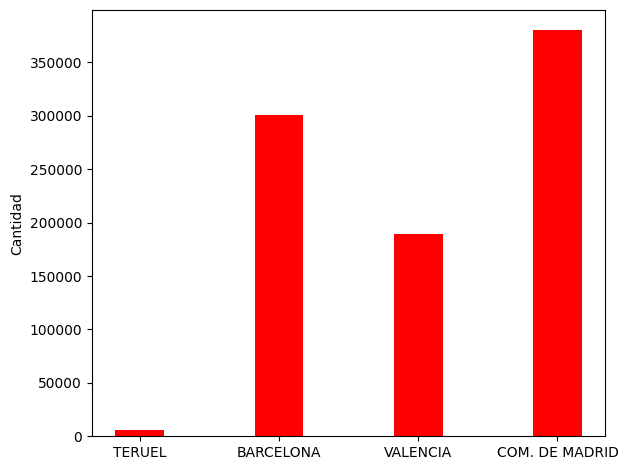

In [80]:
barras_ciudades(ruta_datos, ["COM. DE MADRID", "BARCELONA", "VALENCIA", "TERUEL"])

Sin embargo, es posible complicar este diagrama. Por ejemplo, podemos comparar el paro entre hombres y mujeres por tramo de edad. Para ello, primero calculamos el total de parados en todas las provincias:

In [81]:
def datos_provincia_totales(ruta):
    libro = open_workbook(ruta)
    hoja = libro.sheet_by_index(0)
    # Evitamos coger datos de comunidades, solo de provincias
    # Sí cogemos las comunidades con una sola provincia, ya que no se hacen distinciones
    comunidades = [16, 20, 25, 32, 42, 47, 51, 54, 59, 66]
    etiquetas = [hoja.cell(6,5).value, hoja.cell(6,7).value, hoja.cell(6,9).value, hoja.cell(6,11).value]
    totalesH = [0, 0, 0, 0]
    totalesM = [0, 0, 0, 0]
    for i in range(8, 71):
        if comunidades.count(i) == 0:
            for j in range(8):
                if j % 2 == 0:
                    totalesH[j // 2] = totalesH[j // 2] + hoja.cell(i,5 + j).value
                else:
                    totalesM[j // 2] = totalesM[j // 2] + hoja.cell(i,5 + j).value
    return totalesH, totalesM

A continuación, manipulamos las posiciones para que las barras estén juntas. Además, cambiamos el color para comparar más fácilmente.

In [82]:
def totales_barras(ruta):
    hom, muj = datos_provincia_totales(ruta)
    
    ind = np.arange(4)  # índices para las X
    ancho = 0.35        # Ancho de las barras

    fig, eje = plt.subplots()
    etqs = ["Menores 25", "25-29", "30-44", "Mayores 45"]
    barrasH = eje.bar(ind, hom, ancho, color='b')
    barrasM = eje.bar(ind + ancho, muj, ancho, color='y', tick_label=etqs)

    plt.ylabel('Cantidad')

    plt.legend((barrasH[0], barrasM[0]), ('Hombres', 'Mujeres'))
    
    plt.tight_layout()

    plt.savefig("barras2")
    plt.show()

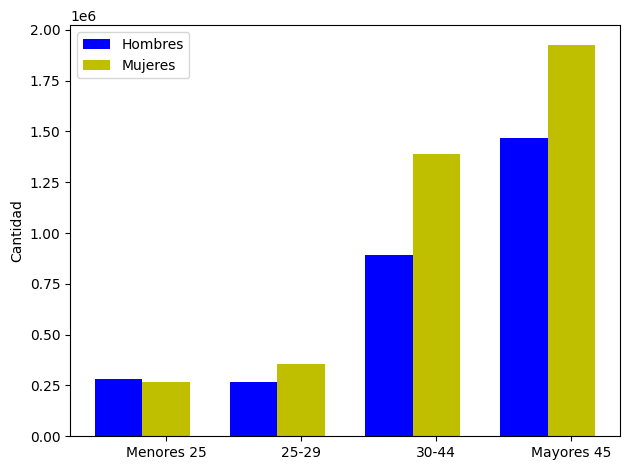

In [83]:
totales_barras(ruta_datos)

En el diagrama anterior perdemos información sobre el total por tramos de edad. Para verlo más fácilmente podemos "apilar" las barras, como mostramos a continuación:

In [84]:
def totales_barras_pila(ruta):
    hom, muj = datos_provincia_totales(ruta)
    
    ind = np.arange(4)  # índices para las X
    ancho = 0.35        # Ancho de las barras

    fig, eje = plt.subplots()
    etqs = ["Menores 25", "25-29", "30-44", "Mayores 45"]
    barrasH = eje.bar(ind, hom, ancho, color='b')
    barrasM = eje.bar(ind, muj, ancho, bottom=hom, color='y', tick_label=etqs)

    plt.ylabel('Cantidad')

    plt.legend((barrasH[0], barrasM[0]), ('Hombres', 'Mujeres'))
    
    plt.tight_layout()

    plt.savefig("barras3")
    plt.show()

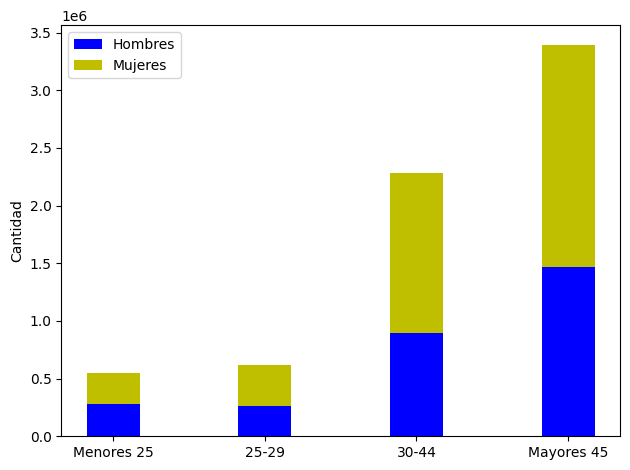

In [85]:
totales_barras_pila(ruta_datos)

Por último mostramos cómo crear un histograma. Para ello, cogemos datos totales en un solo tramo de edad:

In [86]:
def porcentajes_edad(ruta, tramo):
    libro = open_workbook(ruta)
    hoja = libro.sheet_by_index(0)
    # Evitamos coger datos de comunidades, solo de provincias
    # Sí cogemos las comunidades con una sola provincia, ya que no se hacen distinciones
    comunidades = [16, 20, 25, 32, 42, 47, 51, 54, 59, 66]
    totales = []
    for i in range(8, 71):
        if i not in comunidades:
            total = hoja.cell(i, 2).value
            total_tramo = hoja.cell(i,5 + (tramo * 2)).value + hoja.cell(i,5 + (tramo * 2) + 1).value
            porcent = (100 * total_tramo) / total
            totales.append(porcent)
    return totales    

In [87]:
porcentajes_edad(ruta_datos, 0)

[8.286365271615301,
 8.272979612672685,
 10.053396183704177,
 9.399532223328624,
 8.419951764027918,
 10.762609937608058,
 8.407994927921408,
 8.64999828983822,
 10.745762711864407,
 10.705842620736238,
 9.562209884408848,
 6.9824732479663325,
 13.033444380339096,
 6.581513874032593,
 6.094598944565291,
 7.039697730492928,
 9.139413888299002,
 10.73787507076807,
 8.709308966304969,
 8.255480246687428,
 9.277752146801006,
 8.188625139397802,
 7.590874905991477,
 7.884580594584816,
 9.569377990430622,
 8.29913542372206,
 8.86419434035405,
 9.58694543600204,
 8.794260587826892,
 7.241591153432652,
 6.714651417932777,
 7.946934569809376,
 7.269049224544841,
 8.051445389670604,
 6.850828015604413,
 8.876874782002092,
 7.6784636720693635,
 10.709879082010364,
 10.416064341472389,
 4.890815408522124,
 5.399113082039912,
 5.490020407147479,
 4.705882352941177,
 7.6934411434254875,
 10.160408110646605,
 9.175717070453912,
 6.5292937203269545,
 5.573417618048555,
 6.192433470342924,
 6.585010207

In [88]:
def string_tramo(tramo):
    if tramo == 0:
        msj = "menores de 25"
    elif tramo == 1:
        msj = "entre 25 y 29"
    elif tramo == 2:
        msj = "entre 30 y 44"
    else:
        msj = "mayores de 45"
    return msj

def histograma_tramo(ruta, tramo):
    l = porcentajes_edad(ruta, tramo)

    plt.subplots()
    plt.hist(l)
    
    msj = string_tramo(tramo)
    plt.xlabel('Porcentaje de parados')
    plt.ylabel('Porcentaje de ciudades con ese paro')
    plt.title('Porcentajes de paro en el tramo ' + msj)
    
    plt.savefig("histograma")
    plt.show()

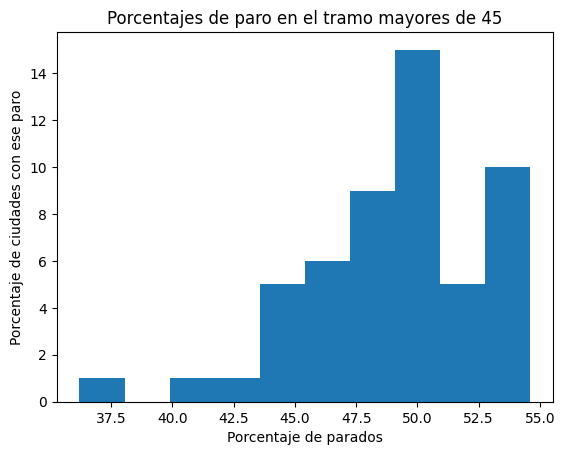

In [89]:
histograma_tramo(ruta_datos, 3)